## 분류 성능평가 지표

* metrics 서브패키지
* confusion_matrix(answer, prediction)
* accuracy_score()
* precision_score()
* recall_score()
* f1_score()
* classification_report()
* roc_curve()
* auc()

In [2]:
# confusion_matrix
#            FALSE TRUE

# FALSE     TN     FP
# TRUE      FN     TP

y_test = [1,0,0,1,1,1,0,1,1,1]
y_pred = [0,1,1,1,1,0,1,0,1,0]

tp = tn = fp = fn = 0
for i in range(len(y_test)) :
    # TP
    if y_test[i] == 1 and y_pred[i] == 1 :
        tp += 1
    # TN
    if y_test[i] == 0 and y_pred[i] == 0 :
        tn += 1
    # FP
    if y_test[i] == 0 and y_pred[i] == 1 :
        fp += 1
    # FN
    if y_test[i] == 1 and y_pred[i] == 0 :
        fn += 1



In [ ]:
# Accuracy
      TP + TN
-----------------
TP + TN + FP + FN


# Recall
       TP
-----------------
    TP + FN
    
# Precision

      TP
-----------------
   TP + FP
    
# F1 score
    Precision * Recall
2* -----------------
    Precision + Recall
    
# Fallout(위 양성율)
# 실제로는 양성클래스에 속하지 않는 표본 중에 양성클래스에 속한다고 예측한 표본의 비율
# 낮아야 좋은 모형으로 본다
# 거레 = 실제 정상거래인데 사기 거래 예측한 거래의 비율(False Positive Rate)

   FP 
------------
   FP + TN

In [3]:
from sklearn.metrics import confusion_matrix

y_true = [2,0,2,2,0,1]
y_pred = [0,0,2,2,0,2]

In [4]:
# 분류결과표
confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

In [5]:
# 이진 분류표

# 품질테스트 결과가 양성 -> 불량품, 음성 -> 정상품

            #불량예측      #정상예측

#불량품      TP               FN

#정상제품    FP              TN


# 암(cancer) - 양성(P) , 암 X -> 음성(N)

          #암 예측        암X 예측
#암        TP                FN
 
#암x       FP                TN

#뒤에 것이 예측하는 방향, 앞에것이 맞추었는지에 대한 여부!!

# 사기거래를 찾아내는 시스템
         #사기예측          #사기X예측

#사기      TP                 FN

#사기X     FP                TN



# FP : 1종 오류


# FN : 2종 오류


In [6]:
y_true = [1,0,1,1,0,1]
y_pred = [0,0,1,1,0,1]
confusion_matrix(y_true, y_pred)

array([[2, 0],
       [1, 3]], dtype=int64)

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [8]:
### fit() 메서드는 아무 것도 수행하지 않고, predict()는 Sex 피처가 1이면 0, 그렇지 않으면 1로 예측하는 단순한 분류기 생성
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    # fit 메서드는 아무것도 학습하지 않음
    def fit(self, X, y=None):
        pass
    # predict 메서드는 단순히 Sex 피처가 1이면 0, 아니면 1로 예측
    def predict(self, X):
        pred = np.zeros( (X.shape[0],1) )
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else :
                pred[i] = 1 
        return pred

In [31]:
titanic = pd.read_csv('./data/titanic_train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [32]:
titanic_label = titanic['Survived']
print(titanic_label)
titanic_feature_df = titanic.drop(['Survived'] , axis=1)
print(titanic_feature_df.head())

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64
   PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S  
1  female  38.0      1      0          PC 17599  71.2833   C85        C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
3  female  35.0      1      0            113803  53.1000  C123        S  
4    male  35.0      0    

In [33]:
## Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

## 머신러닝에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

## Label Encoding 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

## 앞에서 실행한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df


In [34]:
titanic_feature_df = transform_features(titanic_feature_df)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(titanic_feature_df, titanic_label, test_size = .2, random_state=10)

In [36]:
dummy_model = MyDummyClassifier()

In [38]:
dummy_model.fit(X_train, y_train)

In [39]:
y_pred = dummy_model.predict(X_test)
print('accuracy {}'.format(accuracy_score(y_test, y_pred)))

accuracy 0.8212290502793296


* 업무 특성에 따라서 특정지표를 활용해야한다
* Recall -> 암, 사기판정 / precision -> 스팸메일 분류
* recall_score() / precision_score()

In [40]:
from sklearn.metrics import recall_score, precision_score 

In [41]:
def display_eval(y_test, y_pred) :
    confusion = confusion_matrix(y_test, y_pred)   # 분류결과표
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print()
    print(confusion)
    print("*" *50)
    print()
    print('정확도 : {}, 정밀도 : {}, 재현율: {}'.format(accuracy, precision, recall))

In [42]:
from sklearn.linear_model import LogisticRegression
# 로지스틱 회귀
Ir_model = LogisticRegression()
Ir_model.fit(X_train, y_train)
prediction = Ir_model.predict(X_test)
display_eval(y_test, prediction)




[[101  16]
 [ 15  47]]
**************************************************

정확도 : 0.8268156424581006, 정밀도 : 0.746031746031746, 재현율: 0.7580645161290323


In [43]:
print('accuracy : ', (101+47) / (101+15+16+47))

print('recall : ', (47) / (47+15))

print('precision : ', (47) / (47+16))

accuracy :  0.8268156424581006
recall :  0.7580645161290323
precision :  0.746031746031746


In [44]:
# [실습] - 유방암 관련 데이터 - 정확도 보다는 재현율 중요하다(실제 P, N 예측 하면 안되는 경우)
# 재현율은 실제 양성을 양성으로 예측한 비율이므로 높을수록 좋은 성능모형이라 판단 할 수 있다.
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,recall_score, precision_score, confusion_matrix
from sklearn.model_selection import cross_val_score, cross_validate, KFold
from sklearn.metrics import make_scorer, f1_score


import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [22]:
cancer = load_breast_cancer()
print(cancer)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [23]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [24]:
# 데이터 프레임으로 구조를 변경해서 확인 해보자
print(cancer['data'])
print(cancer['target'])
print(cancer['feature_names'])
print(cancer['target_names'])

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

In [25]:
cancer_df = pd.DataFrame(data = cancer['data'], columns=cancer['feature_names'])
display(cancer_df.head())
cancer_df['target'] = cancer['target']
display(cancer_df.head())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [26]:

cancer_f = cancer_df.iloc[:, :-1]
cancer_t = cancer_df.iloc[:, -1]

# 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(cancer_f,
                                                    cancer_t, 
                                                    test_size = 0.2, 
                                                    random_state = 200)




In [27]:
# 분류 학습기 생성
random_forest = RandomForestClassifier()


In [28]:
# 학습 및 평가(교차검증)
fold = KFold(n_splits = 20,
            random_state = 1, 
            shuffle = True)

scoring = {
    'accuracy' : make_scorer(accuracy_score),
    'precision' : make_scorer(precision_score),
    'recall' : make_scorer(recall_score),
    'f1-score' : make_scorer(f1_score)
}

result = cross_validate(random_forest,
                       cancer_f,
                       cancer_t,
                       cv = fold,
                       scoring = scoring)

print(result.keys())

dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_precision', 'test_recall', 'test_f1-score'])


In [29]:
# 평가지표에 대한 평균값을 구해보자 
print('accuracy' ,  np.round( result['test_accuracy'].mean(), 2) )
print('precision' , np.round( result['test_precision'].mean(), 2) )
print('recall' ,    np.round( result['test_recall'].mean(), 2) )
print('f1_score' ,    np.round( result['test_f1-score'].mean(), 2) )

accuracy 0.96
precision 0.96
recall 0.97
f1_score 0.97


In [ ]:
# 분류하려는 업무에 따라 정밀도, 재현율 중 강조되어야 하는부분이 다름.이때 Threshold을 조정해 정밀도나, 재현율의 수치를 높임
# 이 두가지 지표는 상호 보완적인 지표이기 때문에 한쪽을 강제로 높이면 다른쪽의 수치는 떨어지므로 Trade-OFF현상이 나타남.
# 하여 적절한 값을 찾아내는것이 중요함

# precision / recall tradeOff
* predict_proba() : 예측레이블의 확률을 반환해주는 함수

In [47]:
# titanic LogisticRegression 했던 모델을 가지고 테스트하는 코드
pred_pro_result = Ir_model.predict_proba(X_test)
print('shape', pred_pro_result.shape)
print('result\n', pred_pro_result[:3]) #0.5를 기준
print()
print("*" * 50)
print()
y_pred = Ir_model.predict(X_test)
print(y_pred)

result = np.concatenate([pred_pro_result, y_pred.reshape(-1,1)], axis = 1)
print('확률에 따른 예측 결과\n' , result[:5])

shape (179, 2)
result
 [[0.90642125 0.09357875]
 [0.85371789 0.14628211]
 [0.8771801  0.1228199 ]]

**************************************************

[0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1
 0 1 0 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1]
확률에 따른 예측 결과
 [[0.90642125 0.09357875 0.        ]
 [0.85371789 0.14628211 0.        ]
 [0.8771801  0.1228199  0.        ]
 [0.07331652 0.92668348 1.        ]
 [0.10645454 0.89354546 1.        ]]


* Binarizer 클래스 fit_transform()

In [62]:
from sklearn.preprocessing import Binarizer
user_threshold = 0.4
# pred_pro_result[:, 1]
positive_pred_proba = pred_pro_result[: , 1].reshape(-1,1)
# positive_pred_proba

user_predict = Binarizer(threshold=user_threshold).fit(positive_pred_proba).transform(positive_pred_proba)
display_eval(y_test, user_predict)


[[95 22]
 [13 49]]
**************************************************

정확도 : 0.8044692737430168, 정밀도 : 0.6901408450704225, 재현율: 0.7903225806451613


* threshold를 낮추면 재현율은 올라가고, 정밀도는 떨어진다
* precision_recall_curve(정답, 예측확률값) : 정밀도, 재현율 값을 리턴시켜준다

In [71]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일 때의 예측확률을 추출
pred_positive_label = Ir_model.predict_proba(X_test)[:, 1]
# print(pred_positive_label)
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_positive_label)
# print('precisions\n', precisions)
# print('recalls\n', recalls)
print('thresholds\n',thresholds.shape[0])

thresholds
 162


* 시각화(정밀도, 재현율이 임계값 변화에 따른 시각화)

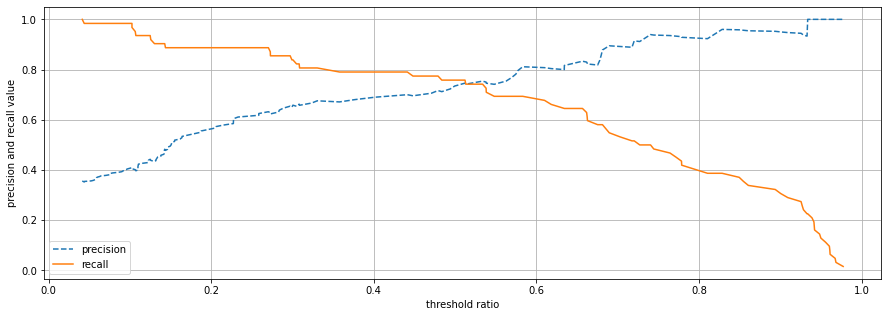

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline

precisions, recalls, thresholds = precision_recall_curve(y_test, pred_positive_label)

plt.figure(figsize=(15,5))

plt.plot(thresholds, precisions[0 : thresholds.shape[0]], linestyle='--', label='precision')
plt.plot(thresholds, recalls[0 : thresholds.shape[0]], label = 'recall')

plt.xlabel('threshold ratio')
plt.ylabel('precision and recall value')
plt.legend()
plt.grid()
plt.show()

* 타이타닉을 이용한 생존자 예측 FPR, TPR, 임계값
* roc_curve(실제값, 예측확률값) : FPR, TPR, 임계값

In [75]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일 때의 예측확률을 추출
pred_positive_label = Ir_model.predict_proba(X_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test , pred_positive_label)
print(fprs.shape[0])
print(tprs.shape[0])
print(thresholds.shape[0])

print('샘플추출')
print()
thr_idx = np.arange(1, thresholds.shape[0] , 6)
print('thr idx : ', thr_idx)
print(thresholds[thr_idx])
print('threshold value : ', thresholds[thr_idx])
print()
print('fprs value : ', fprs[thr_idx])
print()
print('tprs value : ', tprs[thr_idx])

56
56
56
샘플추출

thr idx :  [ 1  7 13 19 25 31 37 43 49 55]
[0.97705291 0.72696136 0.65654307 0.5120958  0.3304279  0.29711527
 0.18758072 0.12499306 0.109969   0.02692116]
threshold value :  [0.97705291 0.72696136 0.65654307 0.5120958  0.3304279  0.29711527
 0.18758072 0.12499306 0.109969   0.02692116]

fprs value :  [0.         0.02564103 0.06837607 0.13675214 0.20512821 0.23931624
 0.37606838 0.62393162 0.72649573 1.        ]

tprs value :  [0.01612903 0.5        0.64516129 0.75806452 0.80645161 0.85483871
 0.88709677 0.93548387 0.93548387 1.        ]


<function matplotlib.pyplot.show(*args, **kw)>

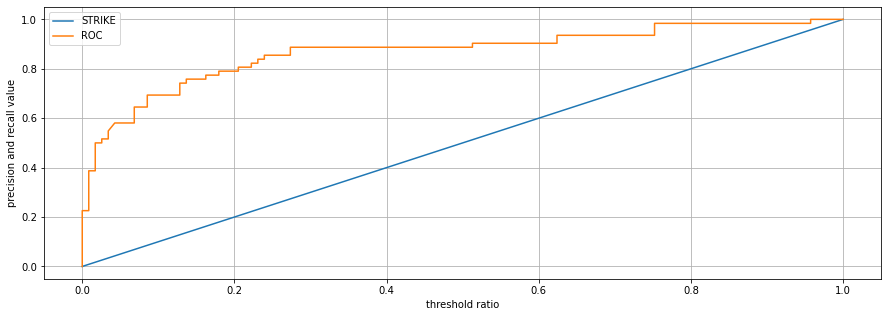

In [76]:
# 시각화
import matplotlib.pyplot as plt
%matplotlib inline

pred_positive_label = Ir_model.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_positive_label)

plt.figure(figsize=(15,5))

# 대각선
plt.plot([0,1] , [0,1] , label = 'STRIKE')

# ROC
plt.plot(fprs, tprs, label = 'ROC')

plt.xlabel('threshold ratio')
plt.ylabel('precision and recall value')
plt.legend()
plt.grid()
plt.show

In [78]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

# 위 코드 확인 후 
# 로지스틱 회귀
Ir_model = LogisticRegression()
Ir_model.fit(X_train, y_train)
prediction = Ir_model.predict(X_test)
print('roc auc value {}'.format(roc_auc_score(y_test , prediction)))

roc auc value 0.8106561896884479
